**Loading DataSet from the Kaggle.com**

In [2]:
!pip install -q kaggle

In [3]:
# Now Loading that DataSet from the Kaggle.com
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Import DataSet**

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 156M/163M [00:01<00:00, 152MB/s]
100% 163M/163M [00:01<00:00, 139MB/s]


 **Unzip the file**

In [5]:
# Unzip the file
from zipfile import ZipFile
Dataset = "/content/face-mask-dataset.zip"

with ZipFile(Dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Now Data has been Succssfully Loaded

In [6]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Naccssary Librires**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import os
import cv2
from PIL import Image


**Loading with mask Data**

In [8]:
with_mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')
print("with Mask DataSet")
print("----------------------------------------------------------------------")
print(with_mask[:5])

print("\n\nwithout Mask DataSet")
print("----------------------------------------------------------------------")
print(without_mask[:5])


with Mask DataSet
----------------------------------------------------------------------
['with_mask_2449.jpg', 'with_mask_3334.jpg', 'with_mask_2619.jpg', 'with_mask_1420.jpg', 'with_mask_2891.jpg']


without Mask DataSet
----------------------------------------------------------------------
['without_mask_2559.jpg', 'without_mask_1405.jpg', 'without_mask_3235.jpg', 'without_mask_511.jpg', 'without_mask_2769.jpg']


In [9]:
print(f"Total number of with mask images: {len(with_mask)}")
print(f"Total number of without mask images: {len(without_mask)}")

Total number of with mask images: 3725
Total number of without mask images: 3828


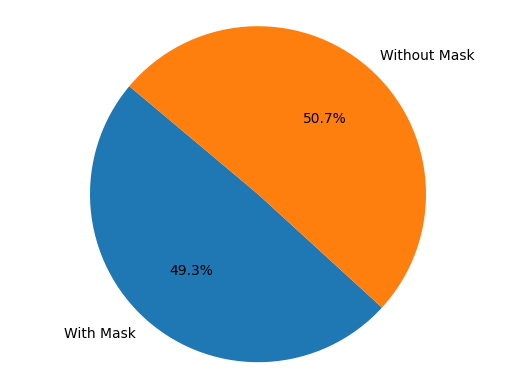

In [10]:
import matplotlib.pyplot as plt

# Data
labels = ['With Mask', 'Without Mask']
sizes = [3725, 3828]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio for a circular pie
plt.axis('equal')

# Display the chart
plt.show()


Almost Data lable are Balanced

**Now Display some of The Images**

**with mask Image**

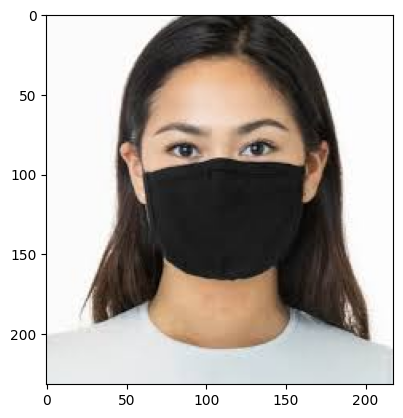

In [11]:
image=mpimg.imread('/content/data/with_mask/with_mask_2119.jpg')
plt.imshow(image)
plt.show()

In [12]:
file_path="/content/data/with_mask/"
p=0
with_mask_sample=[]
for image_path in with_mask:
  if p<10:
    full_path=os.path.join(file_path,image_path)
    with_mask_sample.append(full_path)
  else:
    break
  p+=1



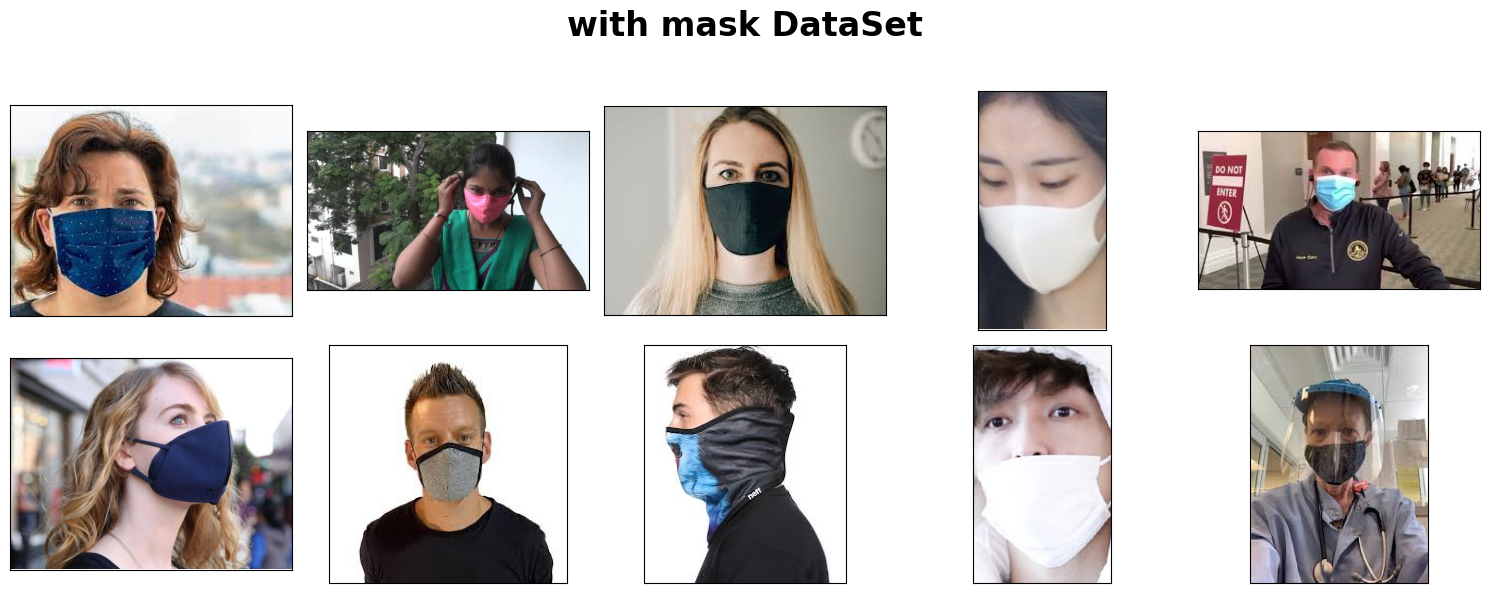

In [13]:
# Number of digits to display
n = 10

# Create a figure to display the images
fig = plt.figure(figsize=(15, 6))

# Add an H1-style heading
fig.suptitle('with mask DataSet', fontsize=24, fontweight='bold')

# Loop through the first 'n' images, using enumerate to get indices
for index, image_path in enumerate(with_mask_sample[:n]):  # Iterate with index
    # Create a subplot within the figure
    ax = plt.subplot(2, 10 // 2, index + 1)  # Use index + 1 for subplot number

    image = mpimg.imread(image_path)
    plt.imshow(image)

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

**With Out Mask**

In [14]:

file_path1="/content/data/without_mask"
p=0
without_mask_sample=[]
for image_path in without_mask:
  if p<10:
    full_path=os.path.join(file_path1,image_path)
    without_mask_sample.append(full_path)
  else:
    break
  p+=1


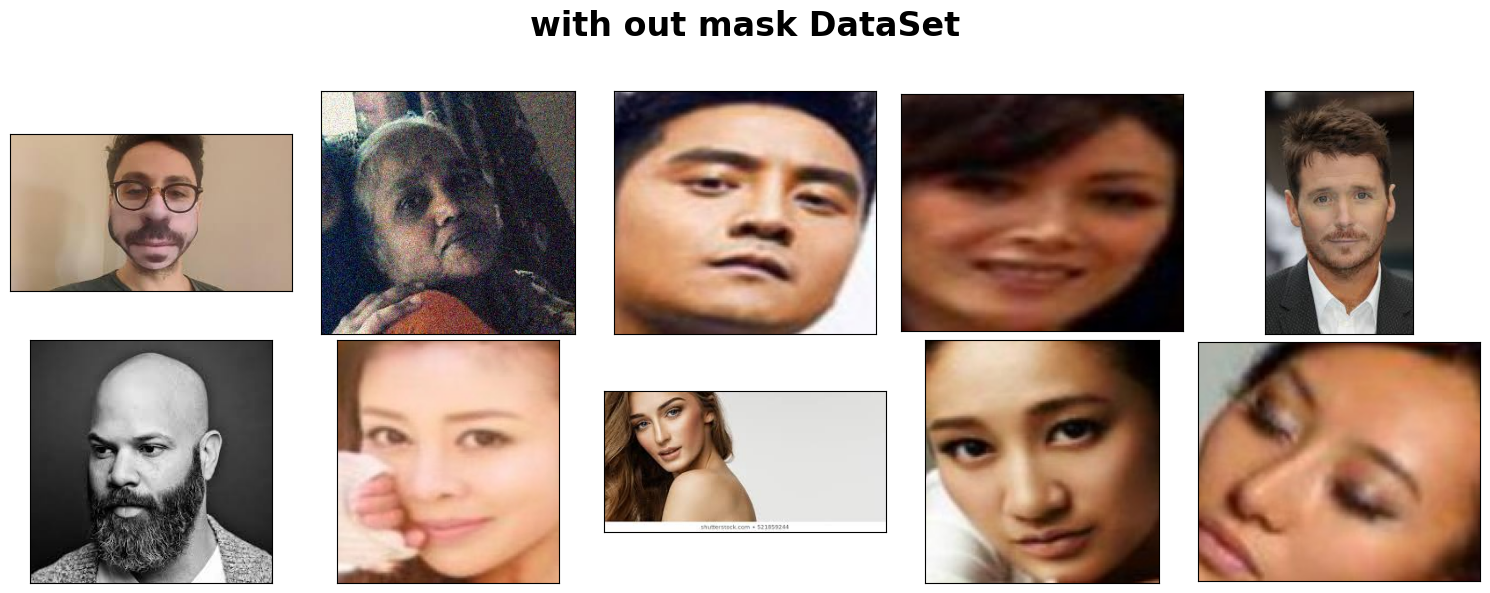

In [15]:
# Number of digits to display
n = 10

# Create a figure to display the images
fig = plt.figure(figsize=(15, 6))

# Add an H1-style heading
fig.suptitle('with out mask DataSet', fontsize=24, fontweight='bold')

# Loop through the first 'n' images, using enumerate to get indices
for index, image_path in enumerate(without_mask_sample[:n]):  # Iterate with index
    # Create a subplot within the figure
    ax = plt.subplot(2, 10 // 2, index + 1)  # Use index + 1 for subplot number

    image = mpimg.imread(image_path)
    plt.imshow(image)

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

**Now Creating Lable for The Image**

with Mask     ----> 1
<br>
with out Mask ----> 0

In [16]:
print(f"with Mask length : {len(with_mask)}")
print(f"With out  length : {len(without_mask)}")
print(f"Total length : {len(with_mask) + len(without_mask)}")

with Mask length : 3725
With out  length : 3828
Total length : 7553


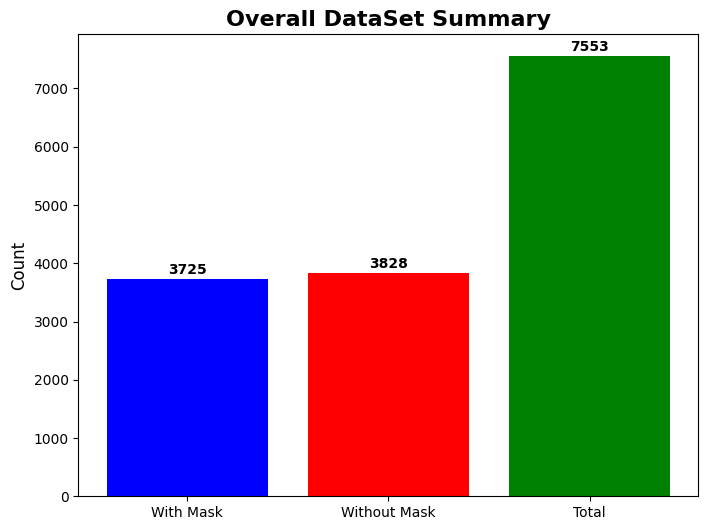

In [17]:


# Data
categories = ['With Mask', 'Without Mask', 'Total']
values = [3725, 3828, 7553]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'red', 'green'])

# Add title and labels
plt.title('Overall DataSet Summary', fontsize=16, fontweight='bold')

plt.ylabel('Count', fontsize=12)

# Display the values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 100, str(value), ha='center', fontsize=10, fontweight='bold')

# Show the plot
plt.show()


In [18]:
with_mask_label=[]
with_mask_label=[1]*len(with_mask)
without_mask_label=[]
without_mask_label=[0]*len(without_mask)

With Mask

In [19]:
with_mask_label[0:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
without_mask_label[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**Now Make full Traget columns**

In [21]:
full_traget_column=with_mask_label+without_mask_label

In [22]:
full_traget_column[3722:3728]

[1, 1, 1, 0, 0, 0]

# **Image Processing**

**Resize the Image**

In [24]:

with_mask_path="/content/data/with_mask/"
with_out_mask_path="/content/data/without_mask/" # Corrected typo here
data=[]

# Process images with masks
for image_file in with_mask:
  image=Image.open(with_mask_path + image_file) # Corrected path concatenation
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

# Process images without masks
for image_file in without_mask:
  image=Image.open(with_out_mask_path + image_file) # Corrected path concatenation
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


**Now your Data are change to numpy array**

array([[[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [249, 250, 252],
        [249, 250, 252],
        [249, 250, 252]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [249, 250, 252],
        [249, 250, 252],
        [249, 250, 252]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [249, 250, 252],
        [249, 250, 252],
        [249, 250, 252]],

       ...,

       [[ 52,  70,  97],
        [ 55,  72,  96],
        [ 50,  62,  80],
        ...,
        [242, 242, 244],
        [233, 238, 238],
        [224, 234, 229]],

       [[ 49,  68,  91],
        [ 55,  73,  94],
        [ 48,  63,  80],
        ...,
        [242, 242, 244],
        [235, 237, 238],
        [225, 231, 228]],

       [[ 53,  71,  86],
        [ 53,  71,  86],
        [ 48,  66,  80],
        ...,
        [240, 241, 243],
        [236, 238, 239],
        [227, 231, 230]]], dtype=uint8)
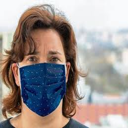

In [30]:
data[0]

In [31]:
len(data)

7553

In [32]:
len(full_traget_column)

7553

**Now converting Data and Lable to Numpy arry**

In [33]:
data=np.array(data)
Y=np.array(full_traget_column)

In [35]:
type(data),type(Y)  #data type


(numpy.ndarray, numpy.ndarray)

In [36]:
data.shape

(7553, 128, 128, 3)

**Now applaying Train Test spliting**

In [37]:
x_train,x_test,y_train,y_test=train_test_split(data,Y,test_size=0.2,random_state=2,stratify=Y)

In [38]:
print(f"x_train .shape {x_train.shape}")
print(f"x_test .shape {x_test.shape}")
print(f"y_train .shape {y_train.shape}")
print(f"y_test .shape {y_test.shape}")


x_train .shape (6042, 128, 128, 3)
x_test .shape (1511, 128, 128, 3)
y_train .shape (6042,)
y_test .shape (1511,)


**Now Scaled the DataSet**

In [39]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [46]:
x_train_scaled

array([[[[0.23529412, 0.45882353, 0.43921569],
         [0.4       , 0.60784314, 0.59215686],
         [0.35294118, 0.5254902 , 0.52156863],
         ...,
         [0.14509804, 0.30980392, 0.29411765],
         [0.18039216, 0.35294118, 0.33333333],
         [0.19215686, 0.37254902, 0.35294118]],

        [[0.37254902, 0.56862745, 0.55686275],
         [0.44313725, 0.61960784, 0.61568627],
         [0.28627451, 0.42745098, 0.43529412],
         ...,
         [0.14509804, 0.28235294, 0.2745098 ],
         [0.16470588, 0.30588235, 0.29803922],
         [0.17647059, 0.3254902 , 0.31764706]],

        [[0.28627451, 0.44705882, 0.44313725],
         [0.27843137, 0.41568627, 0.41960784],
         [0.24705882, 0.34509804, 0.36078431],
         ...,
         [0.1372549 , 0.23529412, 0.23921569],
         [0.14509804, 0.25490196, 0.25490196],
         [0.15294118, 0.2745098 , 0.27058824]],

        ...,

        [[0.24705882, 0.18431373, 0.21176471],
         [0.25882353, 0.19607843, 0.23529412]

In [41]:
x_train_scaled[0].shape

(128, 128, 3)

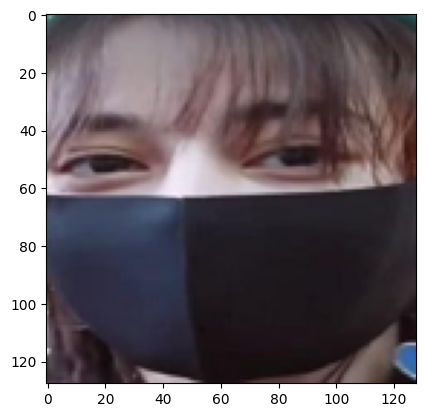

In [44]:
plt.imshow(x_train_scaled[0], cmap='CMRmap_r')

#**Now Bulding a CNN Model**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [52]:
def get_cnn_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3), activation='relu',padding="same", input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))


    model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding="same"))
    model.add(MaxPooling2D((2, 2)))


    model.add(Conv2D(128,kernel_size=(3,3), activation='relu',padding="same"))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))


    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))


    model.add(Dense(2, activation='sigmoid'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

In [53]:
cnn_model=get_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,296,066 (16.39 MB)

 Trainable params: 4,296,066 (16.39 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from time import time

In [55]:
start_time=time()

history=cnn_model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.1)

cnn_model.save('cnn_model.h5')
end_time=time()
print(f"Total time taken : {end_time-start_time}")

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.6697 - loss: 0.6069 - val_accuracy: 0.9025 - val_loss: 0.2815
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8803 - loss: 0.3075 - val_accuracy: 0.9223 - val_loss: 0.1994
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9035 - loss: 0.2639 - val_accuracy: 0.9322 - val_loss: 0.1817
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9118 - loss: 0.2199 - val_accuracy: 0.9306 - val_loss: 0.1753
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9244 - loss: 0.2079 - val_accuracy: 0.9488 - val_loss: 0.1541
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9315 - loss: 0.1861 - val_accuracy: 0.9372 - val_loss: 0.1938
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9352 - loss: 0.1721 - val_accuracy: 0.9504 - val_loss: 0.1781
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9461 - loss: 0.1434 - val_acc

Total time taken : 68.32728862762451


# **First Training**

In [56]:
first=history

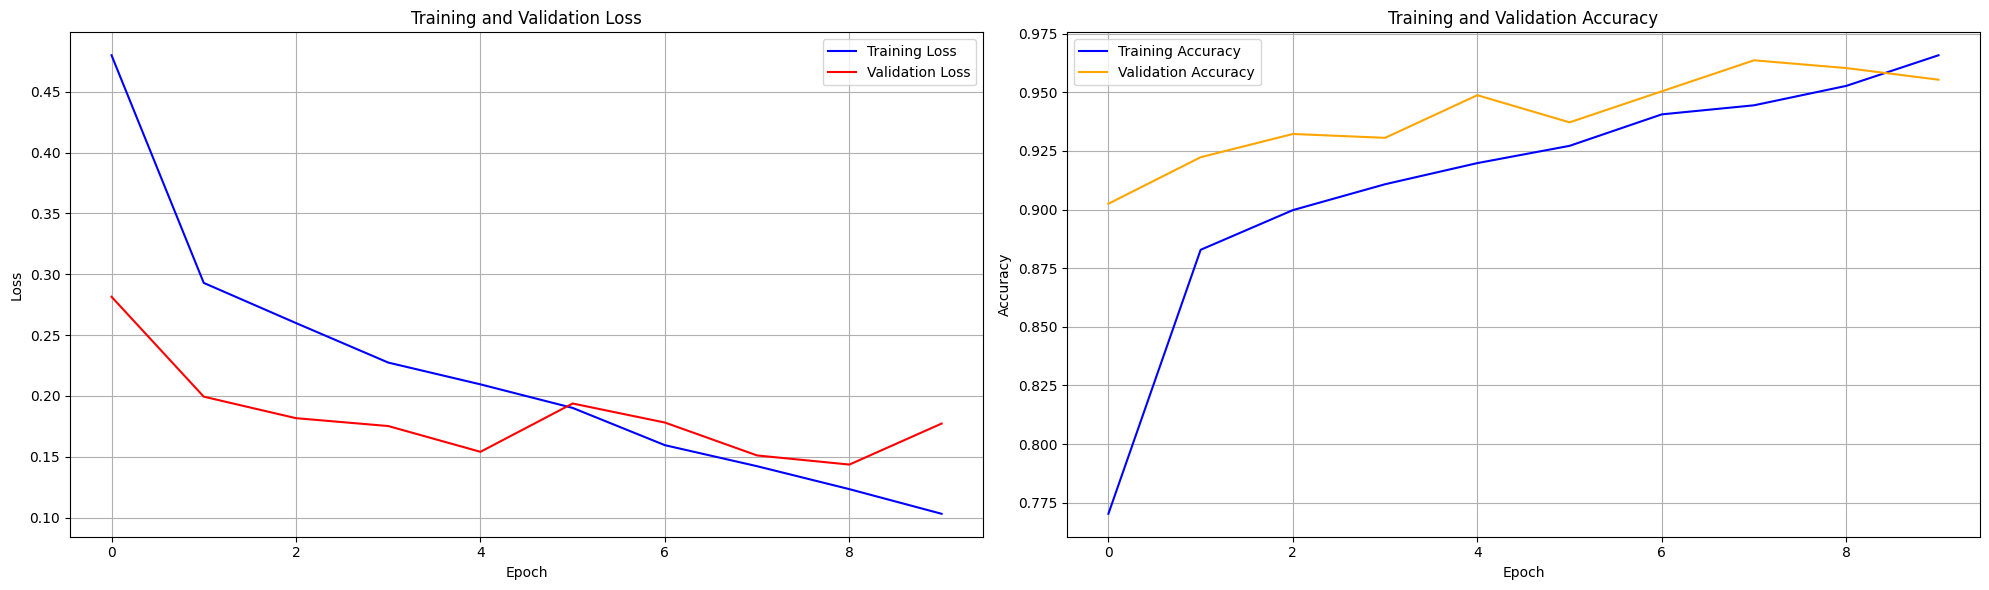

In [57]:

import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    # Plot training and validation accuracy
    ax2.plot(accuracy, label='Training Accuracy', color='blue')
    ax2.plot(val_accuracy, label='Validation Accuracy', color='orange')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
plot_training_history(first)

**Model evaluation**

In [58]:
loss,accuracy=cnn_model.evaluate(x_test_scaled,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9503 - loss: 0.1570
Test Loss: 0.1528
Test Accuracy: 95.17%


#**Now prdicated from the model**

Enter the image path : /content/data/with_mask/with_mask_2119.jpg


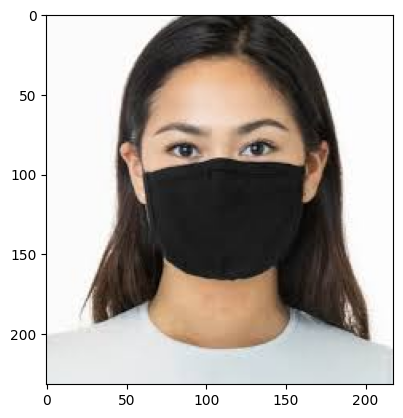

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.11619563 0.9995746 ]]
This person having Mask on Face


In [64]:
input_image=input("Enter the image path : ")
image=mpimg.imread(input_image)
plt.imshow(image)
plt.show()



input_image=cv2.imread(input_image)

input_image=cv2.resize(input_image,(128,128))
input_image_scaled=input_image/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
prediction=cnn_model.predict(input_image_reshaped)

print(prediction)


input_lable=np.argmax(prediction)

if input_lable==1:
  print("This person having Mask on Face")
else:
  print("This person not having Mask on Face")






In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
cnn_model = load_model('/content/cnn_model.h5')

Enter the image path : /content/sqa.jpeg


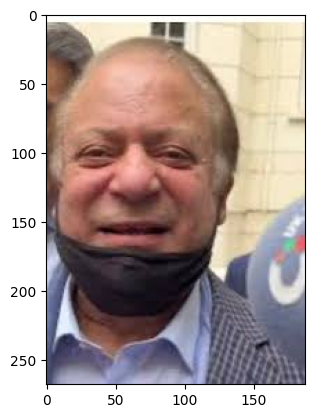

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.3844722 0.8516366]]
This person having Mask on Face


In [12]:
input_image=input("Enter the image path : ")
image=mpimg.imread(input_image)
plt.imshow(image)
plt.show()



input_image=cv2.imread(input_image)

input_image=cv2.resize(input_image,(128,128))
input_image_scaled=input_image/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
prediction=cnn_model.predict(input_image_reshaped)

print(prediction)


input_lable=np.argmax(prediction)

if input_lable==1:
  print("This person having Mask on Face")
else:
  print("This person not having Mask on Face")




